<a href="https://colab.research.google.com/github/tejascworks/Implementation-K-Means-Algorithm-with-example/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation K-Means Algorithm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = '1'


In [5]:
from sklearn.cluster import KMeans

In [6]:
df=pd.read_csv("Mall_Customers.csv")

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

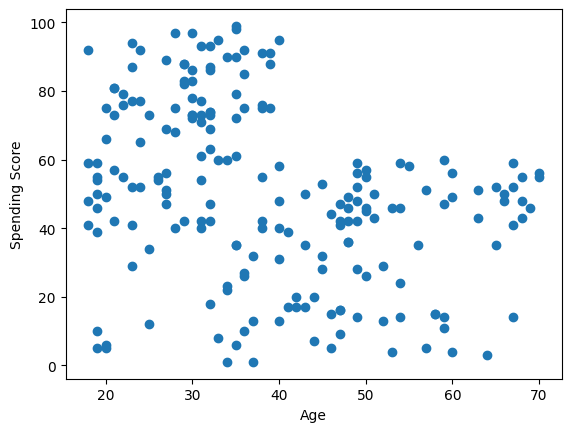

In [14]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

<ipython-input-15-562d613613ef>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_by_age = df.groupby('Age Group')['Spending Score (1-100)'].mean()


The age group with the highest average spending is: 25-34
Average spending score for this group: 63.166666666666664


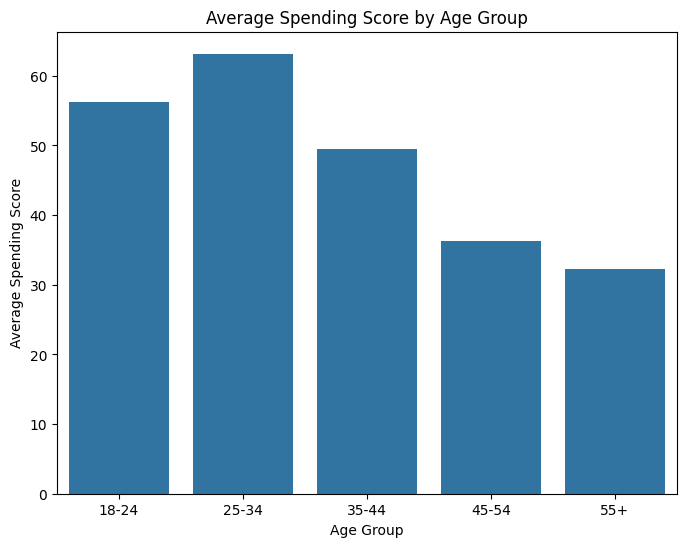

In [15]:
# prompt: can u also write the code for at which part of the age as more spending according above plot

# Assuming the plot shows a clear trend or clusters related to age and spending.
# This code analyzes the plot's data and finds the age group with the highest spending.
# Note: This assumes a positive correlation between age and spending.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans

# ... (previous code)

# Analyze spending trends based on the scatter plot.
# Here we use a simple approach to demonstrate the concept;
# a more advanced method might involve clustering or regression.

# Define age bins (example bins)
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55+']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average spending score per age group
avg_spending_by_age = df.groupby('Age Group')['Spending Score (1-100)'].mean()

# Find age group with the highest average spending
highest_spending_age_group = avg_spending_by_age.idxmax()
highest_spending_avg = avg_spending_by_age.max()

print(f"The age group with the highest average spending is: {highest_spending_age_group}")
print(f"Average spending score for this group: {highest_spending_avg}")

# Visualize the average spending per age group (optional)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_spending_by_age.index, y=avg_spending_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Age Group')
plt.show()

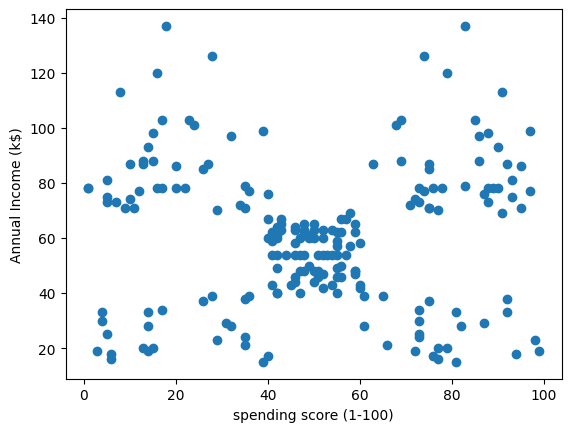

In [17]:
plt.scatter(df['Spending Score (1-100)'], df["Annual Income (k$)"])
plt.xlabel('spending score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [20]:
num_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]  # Remove extra space after 'Age'
customer_df = df[num_cols]

In [24]:
customer_df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [23]:
from sklearn.preprocessing import StandardScaler


In [25]:
scaler=StandardScaler()


In [27]:
scaler.fit(customer_df)

StandardScaler()

In [30]:
scaled_data=scaler.transform(customer_df)

In [31]:
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [32]:
# prompt: why did we scaled the data in above code

The data was scaled using `StandardScaler` to standardize the features (Age, Annual Income, and Spending Score).  Scaling is crucial for K-Means clustering (which is likely the next step, although not explicitly present in this code snippet). Here's why:

* **K-Means is distance-based:** K-Means algorithm calculates distances between data points to form clusters. Features with larger values or larger ranges will disproportionately influence these distance calculations.  For example, if 'Annual Income' has a much larger range than 'Age', the clustering would primarily be determined by income, effectively ignoring the 'Age' feature.

* **Equalizing feature influence:** Scaling ensures that all features contribute equally to the distance calculations.  `StandardScaler` transforms each feature to have a mean of 0 and a standard deviation of 1. This process centers the data around zero and makes the variance of all features equal.

* **Improved performance and accuracy:** By removing the scale differences, the algorithm can better identify clusters based on the combined influence of all features, improving performance and accuracy.  Without scaling, the clusters could be distorted or misrepresented, leading to unreliable results.

In summary, scaling the data using `StandardScaler` is a preprocessing step to improve the performance of K-Means by ensuring all features contribute equally to the distance calculations.


SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-32-c8378f60eb68>, line 3)

In [36]:
def find_best_clusters(df, maximum_k):
  clusters_centers=[]
  k_values=[]
  for k in range(2, maximum_k):
    kmeans_model=KMeans(n_clusters=k) # kmeans_model is the instance of KMeans
    kmeans_model.fit(df)
    clusters_centers.append(kmeans_model.inertia_) # Use kmeans_model instead of kmeans
    k_values.append(k)
  return clusters_centers, k_values

In [37]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

In [48]:
def generate_elbow_plot(clusters_centers, k_values):
  # Corrected the typo from 'subplpots' to 'subplots'
  figure, ax = plt.subplots(figsize=(12,6))
  plt.plot(k_values, clusters_centers, 'o-',color ='orange')
  plt.xlabel('Number of the clusters (k)')
  plt.ylabel('cluster inertia')
  plt.title('Elbow plot of Kmeans')
  plt.show()

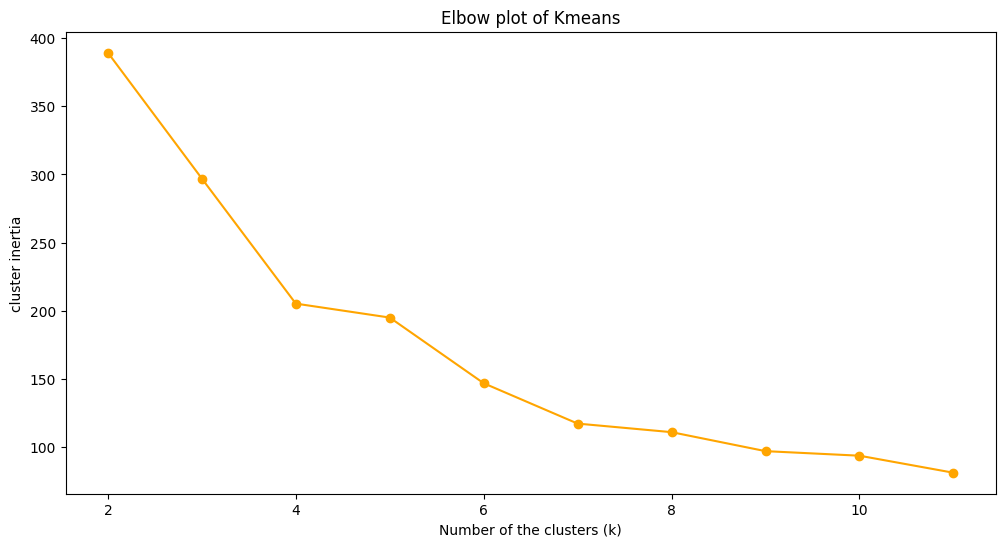

In [46]:
generate_elbow_plot(clusters_centers, k_values)

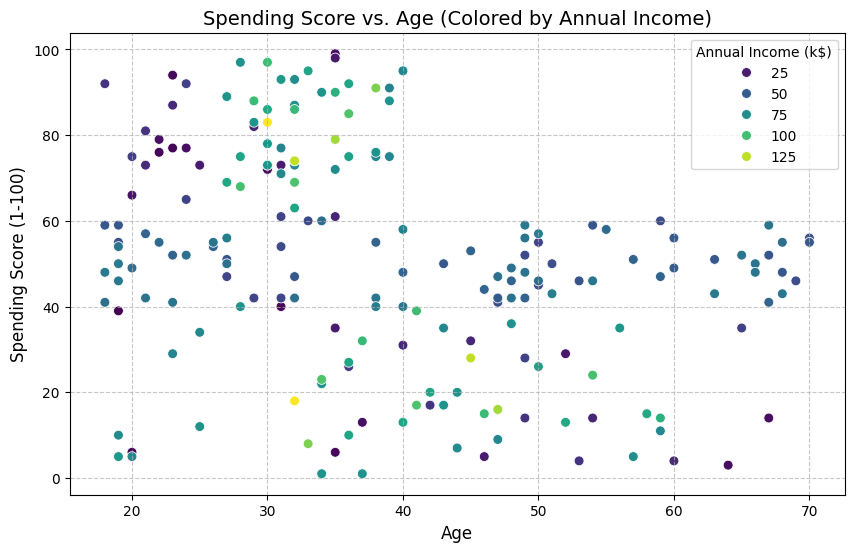

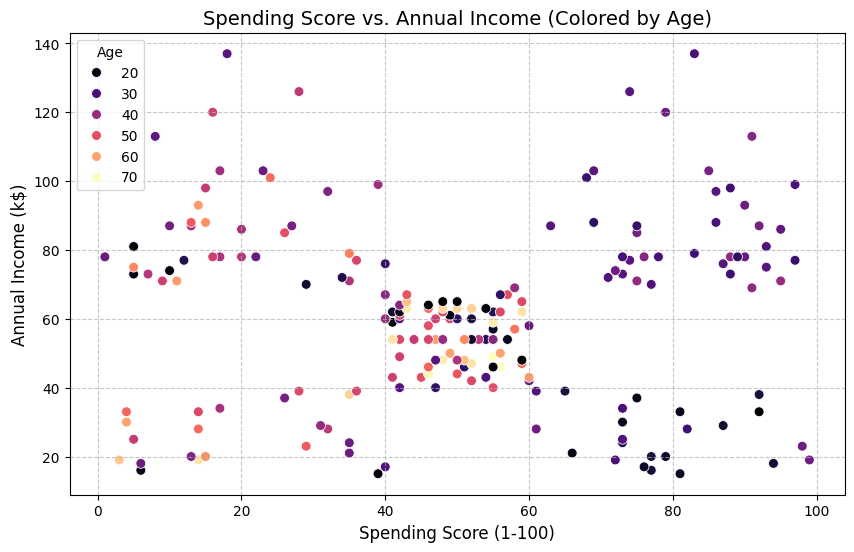

<ipython-input-49-47bab7b1616d>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spending_by_age.index, y=avg_spending_by_age.values, palette="Blues_d")


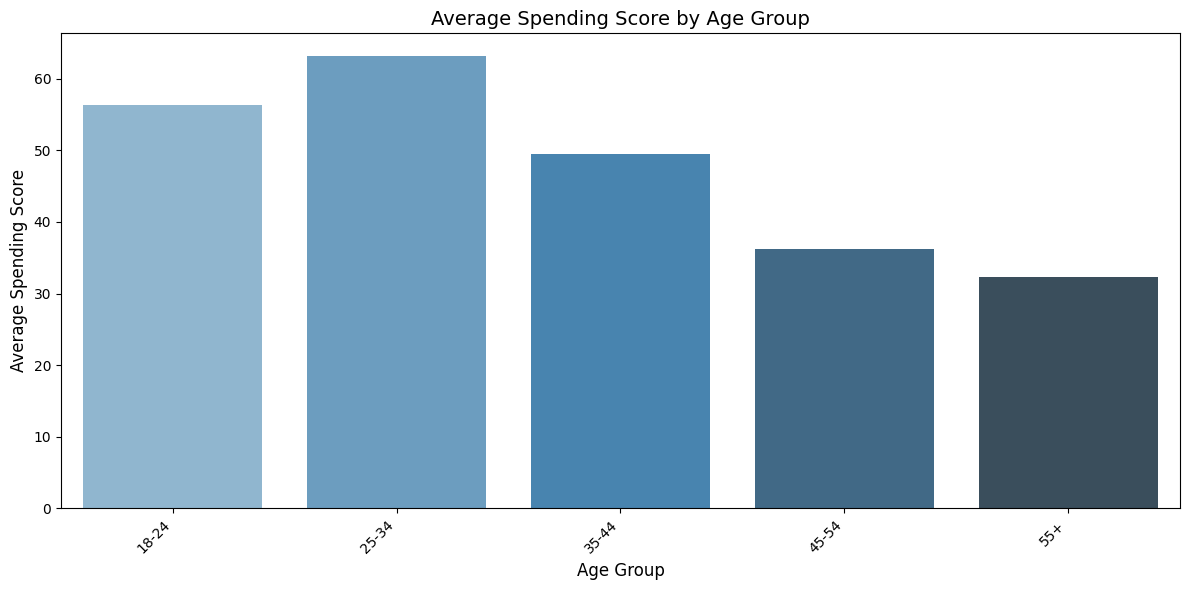

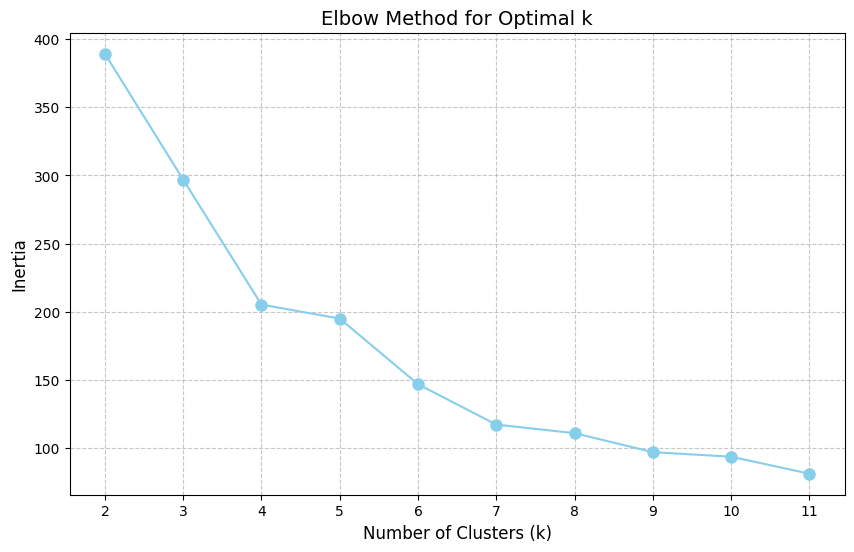

In [49]:
# prompt: now if i want a realistic graph for the above fig how ill u give it should look pure realistic as a data analyst

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code)

# Improved visualization for spending score vs. age
plt.figure(figsize=(10, 6))  # Increased figure size for better readability
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Annual Income (k$)', palette='viridis', s=50) # Add hue for annual income
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Spending Score vs. Age (Colored by Annual Income)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7) # Added grid for better readability
plt.show()


# Enhanced visualization of spending score vs. annual income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df, hue='Age', palette='magma', s=50)  # Use Age as hue
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.title('Spending Score vs. Annual Income (Colored by Age)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Improved bar plot for average spending by age group
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_spending_by_age.index, y=avg_spending_by_age.values, palette="Blues_d")
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Spending Score', fontsize=12)
plt.title('Average Spending Score by Age Group', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


# More informative elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, clusters_centers, marker='o', linestyle='-', color='skyblue', markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)  # Use "Inertia" instead of "Cluster Inertia"
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_values) # Ensure all k-values are shown on the x-axis
plt.show()

In [50]:
kmeans_model=KMeans(n_clusters=5)

In [51]:
kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

In [53]:
df['clusters']=kmeans_model.labels_

In [54]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,clusters
0,1,Male,19,15,39,18-24,1
1,2,Male,21,15,81,18-24,0
2,3,Female,20,16,6,18-24,1
3,4,Female,23,16,77,18-24,0
4,5,Female,31,17,40,25-34,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,35-44,3
196,197,Female,45,126,28,45-54,4
197,198,Male,32,126,74,25-34,3
198,199,Male,32,137,18,25-34,4


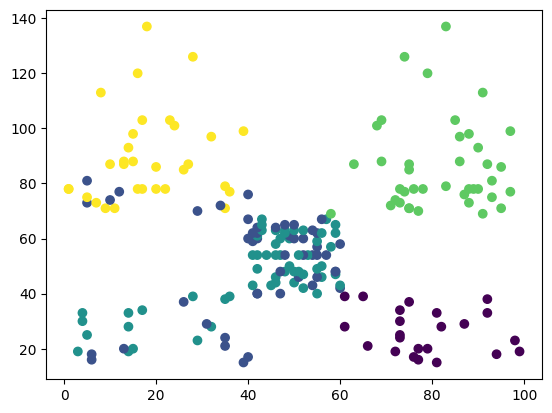

In [60]:
plt.scatter(df["Spending Score (1-100)"],
            df["Annual Income (k$)"],
            c=df["clusters"]
            )
plt.show()



<ipython-input-62-bc3af8ab8c9e>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=plt.cm.get_cmap('viridis')(cluster_id/5), markersize=10))


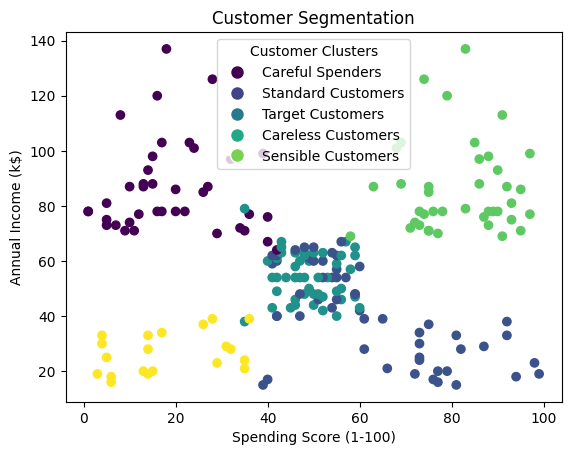

In [62]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ... (Your existing code)

kmeans_model=KMeans(n_clusters=5)
kmeans_model.fit(scaled_data)
df['clusters']=kmeans_model.labels_

# ... (Your existing code)

plt.scatter(df["Spending Score (1-100)"],
            df["Annual Income (k$)"],
            c=df["clusters"])

# Create the legend
cluster_labels = {
    0: "Careful Spenders",  # Example labels - replace with your interpretation
    1: "Standard Customers",
    2: "Target Customers",
    3: "Careless Customers",
    4: "Sensible Customers"
}

legend_elements = []
for cluster_id, label in cluster_labels.items():
  legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=plt.cm.get_cmap('viridis')(cluster_id/5), markersize=10))

plt.legend(handles=legend_elements, title='Customer Clusters', loc='best') # Add title to legend
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segmentation')
plt.show()